# Exercício de Meanshit

Você deve aplicar os conceitos e o algoritmo em dois exemplos, uma com valores criados para exemplificar o modelo e outro com valores reais

## Exemplo Prático

Neste exemplo, iremos criar dados imaginários que serão utilizados para realização da clusterização. Para isso, utilize o segmento de código abaixo e a Variável **X**

In [1]:
from sklearn.datasets import make_blobs
position = [[6,6,3],[3,3,3],[1,1,5]]
X,_=make_blobs(n_samples=500,centers=position,cluster_std=0.70)

### 0 - Importação das bibliotecas

In [2]:
%matplotlib inline
import numpy as np
from sklearn.cluster import MeanShift
import matplotlib.pyplot as plt
import seaborn as sns

### 1 - Visualização dos dados

In [3]:
# Como podemos ver abaixo os nossos dados estão em 3 dimensões, para facilitar vamos
# analisar somente em 2 dimensões (Coluna 0 e 1)
X

array([[5.27269962, 5.66116461, 2.47932943],
       [2.81841092, 3.02792784, 3.23119875],
       [2.58839021, 4.15156674, 3.23345524],
       ...,
       [5.45912875, 6.34773129, 3.64570508],
       [3.3498796 , 2.98312383, 2.32899335],
       [3.50456537, 2.40641123, 3.03222921]])

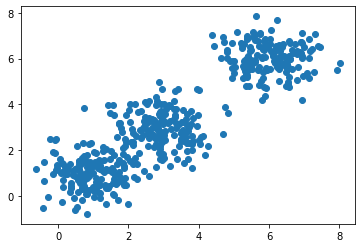

In [4]:
plt.scatter(X[:,0],X[:,1])
plt.show()

### 2 - Aplicação básica do Meanshift

In [5]:
MS = MeanShift()
MS.fit(X)
labels = MS.labels_
print(labels)

cluster_center = MS.cluster_centers_
print(cluster_center)

[1 0 0 0 1 2 2 0 2 1 1 0 1 1 2 0 2 0 0 2 0 2 0 0 0 0 0 0 1 0 0 0 2 2 0 1 0
 1 1 0 2 2 1 1 1 2 2 1 2 1 2 1 0 0 1 2 0 2 0 2 0 2 0 0 1 2 1 2 0 1 2 1 2 2
 2 2 0 2 2 1 1 1 0 0 1 0 0 1 0 0 1 0 1 2 0 2 0 1 0 0 2 2 2 1 2 0 2 1 0 0 2
 1 2 0 0 1 2 1 0 1 0 0 1 0 1 2 1 0 0 0 1 1 1 0 0 1 0 1 0 1 1 2 2 1 1 2 1 1
 1 2 1 1 2 0 0 0 2 1 0 1 1 2 1 1 0 1 0 2 1 2 1 1 1 0 0 2 2 0 0 2 2 2 2 2 2
 1 2 2 1 2 0 2 0 0 0 1 2 2 2 2 1 2 2 2 1 0 2 0 1 2 0 0 2 0 1 0 2 2 1 0 0 2
 2 1 0 2 2 1 0 1 0 2 0 0 2 0 1 0 2 2 1 2 0 2 2 0 1 2 0 0 1 1 1 1 1 1 2 1 1
 0 1 0 0 1 0 2 2 2 2 0 2 1 0 2 0 1 1 0 2 0 2 1 1 1 1 0 0 2 2 1 2 2 2 0 0 0
 2 0 2 2 0 2 0 2 1 1 2 2 0 2 2 1 0 1 0 0 1 0 1 2 1 2 0 1 1 0 1 1 0 0 0 2 0
 0 0 2 1 1 2 2 0 2 0 0 1 0 2 1 1 1 1 2 1 2 0 1 2 0 1 2 0 0 1 1 2 1 2 1 0 2
 2 2 1 0 0 0 0 1 1 0 1 1 0 2 0 0 1 1 0 2 1 0 1 2 0 1 2 2 2 2 2 2 2 1 2 1 1
 1 0 2 1 1 0 2 2 2 1 1 0 0 2 2 1 1 0 0 2 1 0 0 1 1 0 0 2 0 1 1 2 2 1 2 1 1
 0 2 1 0 2 2 1 0 2 0 1 1 1 1 2 1 2 0 2 2 1 2 1 1 0 0 2 0 2 0 1 1 1 2 1 2 1
 2 1 1 0 0 0 2 2 2 0 0 1 

### 3 - Visualização dos resultados

Número de Clusteres encontrados: 3


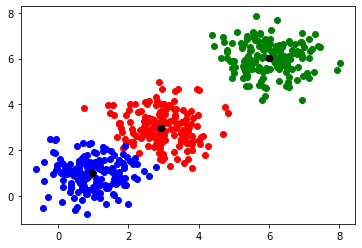

In [7]:
n_clusters = len(np.unique(labels))
print("Número de Clusteres encontrados:", n_clusters)
color = ['Red','Green','Blue', 'Yellow','Purple']
for i in range(0,n_clusters):
  plt.scatter(X[labels == i][:,0], X[labels == i][:,1], color = color[i])
  plt.scatter(cluster_center[:,0],cluster_center[:,1],
            marker=".",color='k', s=20, linewidths = 5, zorder=10)


plt.show()

## Exemplo real - CLusterização de Massa Corporal

Utilizando o dataset abaixo, que contém informação de Altura e Peso de diversos indivíduos, iremos analisar os a diferença do MeanShift e do KMeans nesse processo.

Imagine que você esteja fazendo um estudo sobre o IMC (Índice de Massa Corporal) das pessoas da Região e você deseja classificar elas em N grupos distintos, como fazer isso? Utilizando o aprendizado Não-Supervisionado. Para isso, você deve analisar os valores utilizando o Kmeans e o MeanShift e ao final, avaliar qual seria o melhor resultado.

### 0 - Importação da Biblioteca

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import MeanShift, KMeans
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_blobs
%matplotlib inline

### 1 - Análise Inicial dos dados

In [ ]:
# Em problemas de clusterização, não temos rótulos pré-associados aos dados, portanto, utiliza-se 
# algoritmos de classificação que cria uma associação a estes róstulos, correlacionando as caracte
# rísticas e agrupando as amsotras.

'''Sobre o dataset: Vamos classificar os tipos de massa corporal, utilizando as alturas e pesos.'''
# load do dataset

data = pd.read_csv('/content/Clustering_gmm.csv')
data.head()

,Weight,Height
0,67.062924,176.086355
1,68.804094,178.388669
2,60.930863,170.284496
3,59.733843,168.691992
4,65.431230,173.763679


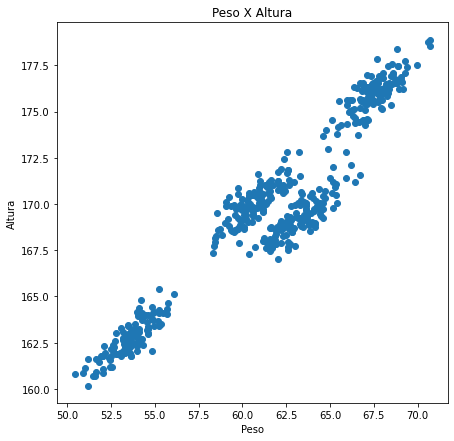

In [ ]:
plt.figure(figsize=(7,7))
plt.scatter("Weight","Height",data=data)
plt.xlabel('Peso')
plt.ylabel('Altura')
plt.title('Peso X Altura')
plt.show()

### 2 - Método do Elbow (Descubrir número de clusteres)

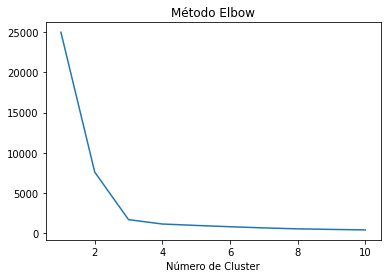

In [ ]:
# Supondo que não soubéssemos quantos clusteres poderíamos fazer com esse data, podemos utilizar o
# método do cotevelo no K-Média.
# Para maior detalhamento: https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/

elbow = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(data)
    elbow.append(kmeans.inertia_)
plt.plot(range(1, 11), elbow)
plt.title('Método Elbow')
plt.xlabel('Número de Cluster')

plt.show()

In [ ]:
# Pelo gráfico acima, podemos ver que o ideal, pelo método Elbow utilizando o Kmeans são 4 clsuter

### 3 - Clusterização utilizando o Kmeans

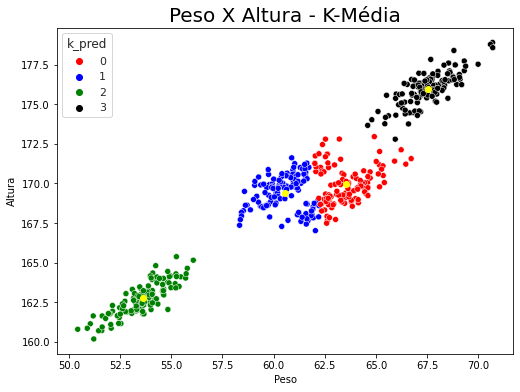

In [ ]:
# Vamos resolver esse exemplo, utilizando e comparando dois métodos
# Treinando o modelo de K-Média
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmedia = kmeans.fit(data)

# Testando o modelo
k_pred = kmeans.predict(data)
frame = pd.DataFrame(data)
frame['k_pred'] = k_pred
save = k_pred
frame.head()

# Plotagem das Clusterização
plt.rcParams['figure.figsize'] = (18, 6) # Formata o comprimento e altura total do plot
color = ['red','blue','green','black']

# K - Média:
plt.subplot(1, 2, 1)
sns.set(style = 'whitegrid')
sns.scatterplot(x="Weight", y="Height",
                hue="k_pred", data=data, palette=color)


for i in range(0,len(kmedia.cluster_centers_)):
  X = kmedia.cluster_centers_.tolist()[i][0]
  Y = kmedia.cluster_centers_.tolist()[i][1]
  plt.scatter(X,Y,color='Yellow')


plt.title('Peso X Altura - K-Média', fontsize = 20)
plt.xlabel('Peso')
plt.ylabel('Altura')

plt.show()



### 4 - Clusterização utilizando o MeanShift

Numero de Clusteres: 3


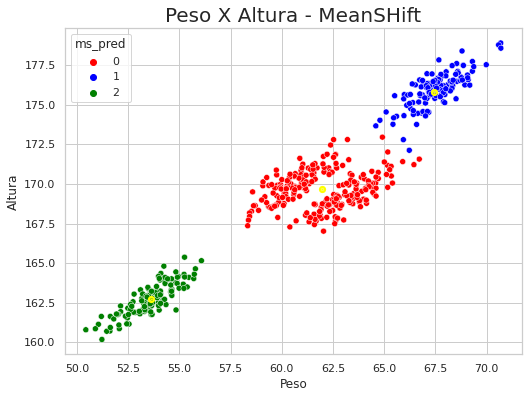

In [ ]:
# Vamos resolver esse exemplo, utilizando e comparando dois métodos
# Treinando o modelo de K-Média
ms = MeanShift(bin_seeding=False,max_iter=-1)
ms.fit(data)
labels = ms.labels_
print("Numero de Clusteres: {}".format(len(ms.cluster_centers_)))

# Testando o modelo
ms_pred = ms.predict(data)
frame = pd.DataFrame(data)
frame['ms_pred'] = ms_pred
save = ms_pred
frame.head()

# Plotagem das Clusterização
plt.rcParams['figure.figsize'] = (18, 6) # Formata o comprimento e altura total do plot
color = ['red','blue','green','black']

# Meanshift:
plt.subplot(1, 2, 1)
sns.set(style = 'whitegrid')
sns.scatterplot(x="Weight", y="Height",
                hue="ms_pred", data=data, palette=['red','blue','green'])


cluster_centers = ms.cluster_centers_
plt.scatter(cluster_centers[:,0],cluster_centers[:,1],
           marker=".",color='yellow', s=20, linewidths = 5, zorder=10)


plt.title('Peso X Altura - MeanSHift', fontsize = 20)
plt.xlabel('Peso')
plt.ylabel('Altura')

plt.show()

### 5 - Comparação visual dos dois métodos

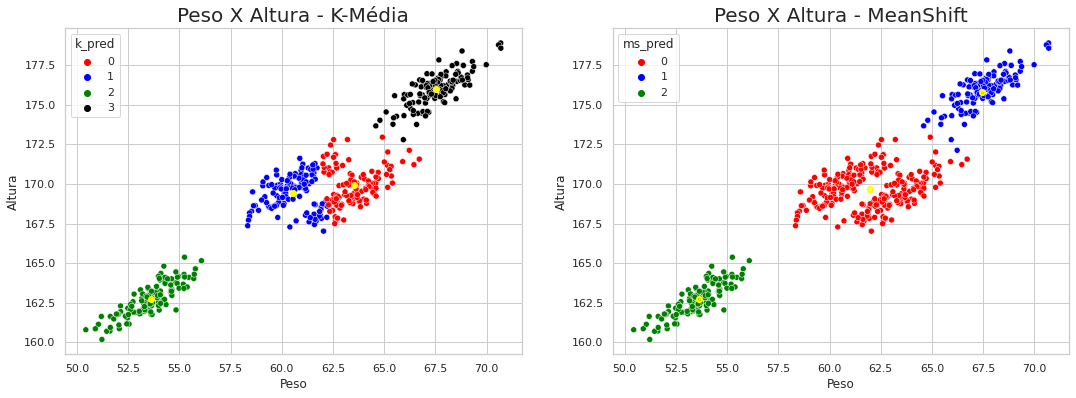

In [ ]:
# Plotagem das Clusterização
plt.rcParams['figure.figsize'] = (18, 6) # Formata o comprimento e altura total do plot
color = ['red','blue','green','black']

# K - Média:
plt.subplot(1, 2, 1)
sns.set(style = 'whitegrid')
sns.scatterplot(x="Weight", y="Height",
                hue="k_pred", data=data, palette=color)

for i in range(0,len(kmedia.cluster_centers_)):
  X = kmedia.cluster_centers_.tolist()[i][0]
  Y = kmedia.cluster_centers_.tolist()[i][1]
  plt.scatter(X,Y,color='Yellow')

plt.title('Peso X Altura - K-Média', fontsize = 20)
plt.xlabel('Peso')
plt.ylabel('Altura')


# Mistura Gaussiana:
plt.subplot(1, 2, 2)
sns.set(style = 'whitegrid')
sns.scatterplot(x="Weight", y="Height",
                hue="ms_pred", data=data, palette=['Red','Blue','Green'])
cluster_centers = ms.cluster_centers_
plt.scatter(cluster_centers[:,0],cluster_centers[:,1],
           marker=".",color='yellow', s=20, linewidths = 5, zorder=10)

plt.title('Peso X Altura - MeanShift', fontsize = 20)
plt.xlabel('Peso')
plt.ylabel('Altura')

plt.show()